In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Метрики/М09/sellers_cohort_analysis_data - sellers_cohort_analysis_data.csv')

In [ ]:
df

,seller_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2021-03-23,1,0,0,0
1,2,2022-11-30,0,0,0,1
2,3,2021-11-17,0,1,0,0
3,4,2021-09-06,1,1,0,0
4,5,2021-01-04,1,1,0,0
...,...,...,...,...,...,...
495,496,2022-03-18,0,0,0,0
496,497,2021-12-17,1,1,0,0
497,498,2021-05-24,1,1,0,0
498,499,2021-08-20,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_id          500 non-null    int64 
 1   registration_date  500 non-null    object
 2   activity_1_month   500 non-null    int64 
 3   activity_3_month   500 non-null    int64 
 4   activity_6_month   500 non-null    int64 
 5   activity_12_month  500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


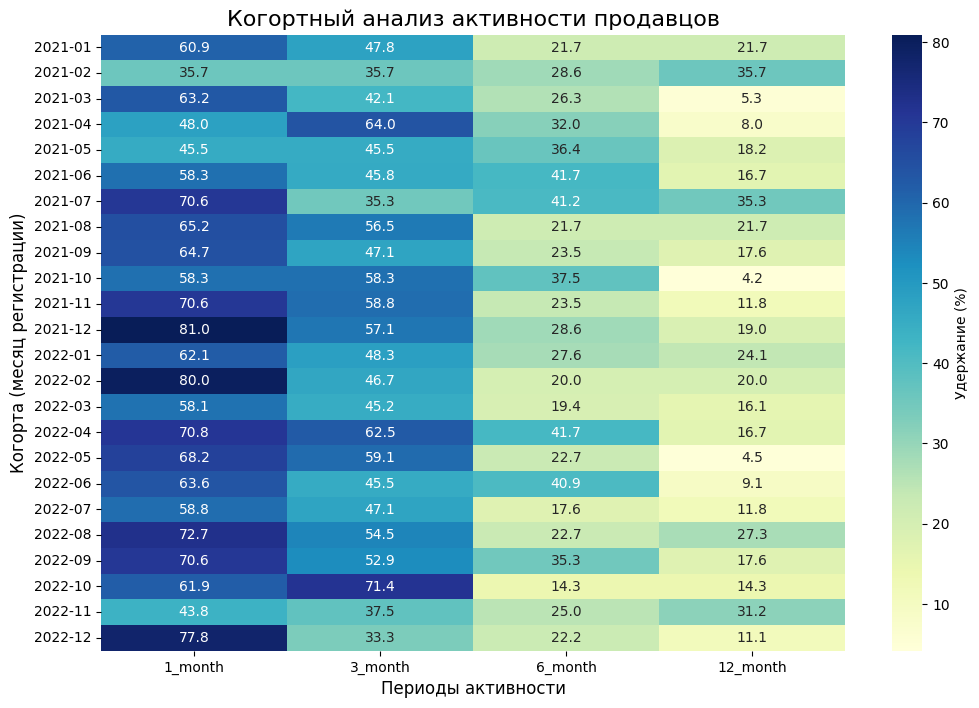

In [ ]:
# 1. Преобразуем дату регистрации в datetime
df["registration_date"] = pd.to_datetime(df["registration_date"])

# 2. Определяем когорту (месяц регистрации)
df["cohort_month"] = df["registration_date"].dt.to_period("M")

# 3. Создаем таблицу для когортного анализа
cohort_analysis = pd.DataFrame()

# Список периодов для анализа
activity_columns = {
    "1_month": "activity_1_month",
    "3_month": "activity_3_month",
    "6_month": "activity_6_month",
    "12_month": "activity_12_month",
}

# Рассчитываем удержание в процентах для каждой когорты
for period_name, activity_col in activity_columns.items():
    # Группируем по когорте и считаем число активных пользователей
    cohort_activity = (
        df.groupby("cohort_month")
        .agg({activity_col: "sum"})  # Сумма активных пользователей
        .reset_index()
        .rename(columns={activity_col: period_name})
    )

    # Общее число пользователей в каждой когорте
    cohort_size = df.groupby("cohort_month")["seller_id"].nunique().reset_index(name="total_users")

    # Объединяем данные
    cohort_activity = cohort_activity.merge(cohort_size, on="cohort_month")

    # Рассчитываем процент удержания
    cohort_activity[period_name] = cohort_activity[period_name] / cohort_activity["total_users"] * 100

    # Добавляем данные в итоговую таблицу
    if cohort_analysis.empty:
        cohort_analysis = cohort_activity[["cohort_month", period_name]]
    else:
        cohort_analysis = cohort_analysis.merge(cohort_activity[["cohort_month", period_name]], on="cohort_month")

# Преобразуем когорты к строкам для удобного отображения
cohort_analysis["cohort_month"] = cohort_analysis["cohort_month"].astype(str)

# Устанавливаем когорты в качестве индекса
cohort_analysis.set_index("cohort_month", inplace=True)

# 4. Визуализация данных в виде тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_analysis, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Удержание (%)"})
plt.title("Когортный анализ активности продавцов", fontsize=16)
plt.xlabel("Периоды активности", fontsize=12)
plt.ylabel("Когорта (месяц регистрации)", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


#**Отчет по когортному анализу активности продавцов за 2021-2022 годы**

**Введение**

Когортный анализ позволяет оценить удержание продавцов в зависимости от времени их активности. В данном отчете представлены данные по периодам активности: 1 месяц, 3 месяца, 6 месяцев и 12 месяцев.

**Основные выводы**

**Удержание продавцов**

Наибольшее удержание наблюдается в когортах, зарегистрированных в 2021 году. Например, для когорты 2021-01 удержание составляет 47.8% через 3 месяца и 21.7% через 12 месяцев.
В 2022 году удержание снижается. Например, для когорты 2022-01 удержание через 3 месяца составляет 48.3%, а через 12 месяцев — 24.1%.

**Динамика активности**

В 2021 году активность продавцов постепенно снижается с увеличением периода. Например, для когорты 2021-06 удержание через 6 месяцев составляет 41.7%, а через 12 месяцев — 16.7%.
В 2022 году наблюдается аналогичная тенденция, но с более низкими показателями. Например, для когорты 2022-07 удержание через 6 месяцев составляет 17.6%, а через 12 месяцев — 11.8%.

**Пик активности**

Наибольшая активность наблюдается в когортах 2021-07 и 2022-02, где удержание через 1 месяц составляет 70.6% и 80.0% соответственно.

**Рекомендации**

Уделить внимание новым продавцам, особенно в 2022 году, для повышения их удержания.

Разработать программы лояльности и обучения для увеличения активности в долгосрочной перспективе.

Анализировать причины снижения удержания в 2022 году и корректировать стратегию.

**Заключение**

Когортный анализ показывает, что удержание продавцов снижается с увеличением времени их активности. Для улучшения показателей рекомендуется усилить поддержку новых продавцов и разработать программы для их долгосрочного удержания.